In [1]:
from astropy.io import fits
import h5py
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import treecorr 

### Load lens catalogs that are input to the TXPipe run

In [2]:
lens_cat_path = '/global/projecta/projectdirs/lsst/groups/WL/users/jprat/gaussian_sims_srdnzs_fullsky/012922/area12300/TXPipe_inputs/lens_catalog.hdf5'
lens_tomo_path = '/global/projecta/projectdirs/lsst/groups/WL/users/jprat/gaussian_sims_srdnzs_fullsky/012922/area12300/TXPipe_inputs/lens_tomography_catalog.hdf5'

In [3]:
lenscat = h5py.File(lens_cat_path, 'r')
lenstomo = h5py.File(lens_tomo_path, 'r')

In [4]:
ra_l = lenscat['lens/ra'][:]
dec_l = lenscat['lens/dec'][:]
lbin = lenstomo['tomography/lens_bin'][:]

#### Select one redshfit bin

In [5]:
bin = 3
ra_l = ra_l[lbin == bin]
dec_l = dec_l[lbin == bin]

### Load random catalog from outputs

In [6]:
path_outputs =  '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/012922/area12300/without_shape_noise/2022/Feb4/'

In [7]:
rancat = h5py.File(path_outputs + 'binned_random_catalog.hdf5', 'r')
ra_r = rancat['randoms/bin_%d/ra'%bin][:]
dec_r = rancat['randoms/bin_%d/dec'%bin][:]

### Reduce catalog to run faster and compute wtheta

In [8]:
mask_l = ra_l<10
mask_r = ra_r<10

In [9]:
len(ra_l[mask_l]), len(ra_r[mask_r]), len(ra_r[mask_r])/len(ra_l[mask_l])

(48093522, 560074802, 11.645535172075773)

In [10]:
cat_l = treecorr.Catalog(ra=ra_l[mask_l], dec=dec_l[mask_l],  ra_units='degrees', dec_units='degrees')
cat_r = treecorr.Catalog(ra=ra_r[mask_r], dec=dec_r[mask_r],  ra_units='degrees', dec_units='degrees')

In [11]:
nn = treecorr.NNCorrelation(nbins=15, min_sep=2.5, max_sep = 100, bin_slop=0.1, sep_units='arcmin')
nn.process(cat_l)
rr = treecorr.NNCorrelation(nbins=15, min_sep=2.5, max_sep = 100, bin_slop=0.1, sep_units='arcmin')
rr.process(cat_r)
dr = treecorr.NNCorrelation(nbins=15, min_sep=2.5, max_sep = 100, bin_slop=0.1, sep_units='arcmin')
dr.process(cat_l, cat_r)
xi,varxi = nn.calculateXi(rr=rr,dr=dr)

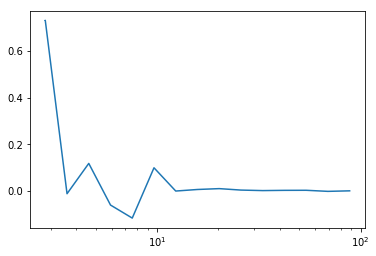

In [14]:
th = np.exp(nn.logr)
plt.errorbar(th, xi*10, yerr=np.sqrt(varxi)*10)
plt.xscale('log')
#plt.yscale('log')

In [13]:
xi, np.sqrt(varxi)

(array([ 7.30729480e-02, -1.11673202e-03,  1.18659801e-02, -5.96710417e-03,
        -1.15520570e-02,  9.99300209e-03,  3.18681825e-05,  6.98562305e-04,
         1.06685506e-03,  4.43818968e-04,  2.25875396e-04,  3.31180776e-04,
         3.56999222e-04, -1.04647665e-04,  1.21003035e-04]),
 array([3.57934961e-05, 2.79933833e-05, 2.18939211e-05, 1.71246683e-05,
        1.33948505e-05, 1.04785776e-05, 8.19770317e-06, 6.41479065e-06,
        5.02007814e-06, 3.92943101e-06, 3.07702502e-06, 2.41016985e-06,
        1.88858642e-06, 1.48113418e-06, 1.16226325e-06]))

In [15]:
xi

array([ 7.30729480e-02, -1.11673202e-03,  1.18659801e-02, -5.96710417e-03,
       -1.15520570e-02,  9.99300209e-03,  3.18681825e-05,  6.98562305e-04,
        1.06685506e-03,  4.43818968e-04,  2.25875396e-04,  3.31180776e-04,
        3.56999222e-04, -1.04647665e-04,  1.21003035e-04])

In [16]:
before = [ 7.30227538e-02, -1.13834416e-03,  1.19377491e-02, -5.97169781e-03,
        -1.15263086e-02,  9.97721454e-03,  1.27211733e-04,  6.24344068e-04,
         1.12617808e-03,  5.44818333e-04,  1.25212865e-04,  4.79166989e-04,
         2.13504450e-04, -8.52527261e-05,  3.39478356e-04]

In [17]:
before/xi

array([0.99931309, 1.01935302, 1.0060483 , 1.00076983, 0.9977711 ,
       0.99842014, 3.9918101 , 0.89375574, 1.05560551, 1.22756883,
       0.55434486, 1.44684421, 0.59805298, 0.81466439, 2.80553589])